In [1]:
import os, sys
from os.path import join
sys.path.insert(0, join(os.path.curdir, '..'))

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from modules.config import cfg
from modules.main.helper.callback import get_checkpoint_callback, get_earlystopping_callback, get_logging_callback, get_tensorboard_callback, get_callbacks
from modules.main.model.get_model import get_refine_net

In [3]:
X_train, y_train = tf.random.uniform((200, 54)), tf.random.uniform((200,54))
X_val, y_val = tf.random.uniform((20, 54)), tf.random.uniform((20, 54))
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape) 

(200, 54) (200, 54)
(20, 54) (20, 54)


In [4]:
model = Sequential([
    tf.keras.layers.Dense(54, activation='relu', input_shape=(54,)),
    tf.keras.layers.Dense(54, activation='relu'),
    tf.keras.layers.Dense(54)
])
# model = get_refine_net()

In [5]:
model.compile(
    optimizer='sgd',
    loss='mae',
    metrics=['accuracy']
)

In [6]:
tf.keras.utils.plot_model(model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 54)                2970      
_________________________________________________________________
dense_1 (Dense)              (None, 54)                2970      
_________________________________________________________________
dense_2 (Dense)              (None, 54)                2970      
Total params: 8,910
Trainable params: 8,910
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    epochs=cfg.epochs,
    # callbacks=[get_tensorboard_callback()] ,
    callbacks =[get_earlystopping_callback()],
    # callbacks=[get_callbacks()],
    # callbacks=[get_logging_callback()],
    # verbose=1
)

Epoch 1/250
7/7 [==============================] - 0s 21ms/step - loss: 0.5136 - accuracy: 0.0300 - val_loss: 0.5161 - val_accuracy: 0.0000e+00
Epoch 2/250
7/7 [==============================] - 0s 4ms/step - loss: 0.5050 - accuracy: 0.0300 - val_loss: 0.5076 - val_accuracy: 0.0000e+00
Epoch 3/250
7/7 [==============================] - 0s 4ms/step - loss: 0.4970 - accuracy: 0.0300 - val_loss: 0.4995 - val_accuracy: 0.0000e+00
Epoch 4/250
7/7 [==============================] - 0s 4ms/step - loss: 0.4893 - accuracy: 0.0300 - val_loss: 0.4921 - val_accuracy: 0.0000e+00
Epoch 5/250
7/7 [==============================] - 0s 4ms/step - loss: 0.4824 - accuracy: 0.0250 - val_loss: 0.4851 - val_accuracy: 0.0000e+00
Epoch 6/250
7/7 [==============================] - 0s 4ms/step - loss: 0.4757 - accuracy: 0.0200 - val_loss: 0.4783 - val_accuracy: 0.0000e+00
Epoch 7/250
7/7 [==============================] - 0s 4ms/step - loss: 0.4693 - accuracy: 0.0200 - val_loss: 0.4719 - val_accuracy: 0.0000e+0

In [9]:
# %load_ext tensorboard
# %tensorboard --logdir=cfg.log_dir --port=6006

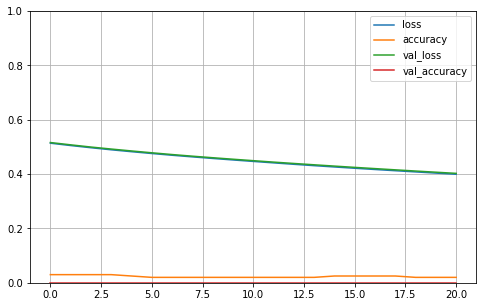

In [11]:
from modules.main.helper.visualize.plot import plot_history
plot_history(history)